<a href="https://colab.research.google.com/github/Narissarach/Project_eye/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 1

*** การกำหนดขนาดจากเปเปอร์ (https://www.agi.nu.ac.th/nred/Document/is-PDF/2562/geo_2562_05_FullPaper.pdf) ***

In [1]:
import tensorflow as tf
import PIL
import time
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pickle as p
import pathlib
import plotly
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import plotly.graph_objs as go
from tensorflow import keras
from tensorflow.keras.models import Sequential

## เตรียมชุดของข้อมูล

In [2]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่า Mounted at /content/drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
batch_size = 10   # กำหนดขนาดของแต่ละการอ่านข้อมูล
img_height = 256  # ความสูงของรูปภาพแต่ละรูป
img_width = 256   # ความกว้างของรูปภาพแต่ละรูป

## Train

In [4]:
#Train
data_train = pathlib.Path('/content/drive/MyDrive/2022Project/for_code/train')
train = tf.keras.utils.image_dataset_from_directory(data_train,image_size=(img_height, img_width))

Found 1216 files belonging to 4 classes.


In [5]:
class_names = train.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


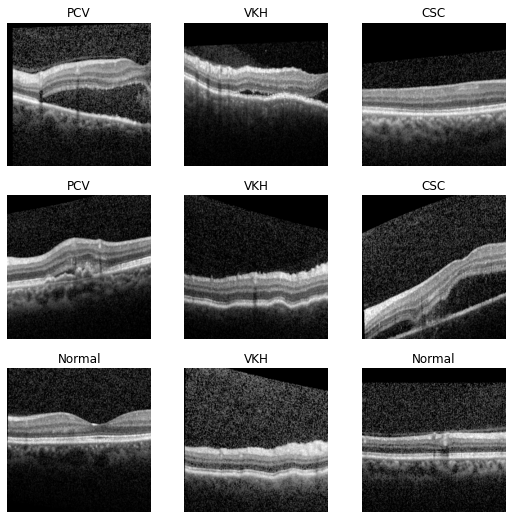

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in train.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [7]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


## Validation

In [8]:
#Validation
data_validation = pathlib.Path('/content/drive/MyDrive/2022Project/for_code/validation')
val = tf.keras.utils.image_dataset_from_directory(data_validation,image_size=(img_height, img_width))

Found 152 files belonging to 4 classes.


In [9]:
class_names = val.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


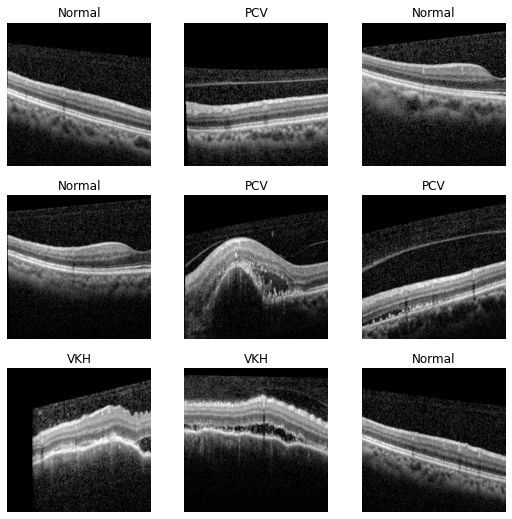

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in val.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in val:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


## Test

In [12]:
#Test
data_test = pathlib.Path('/content/drive/MyDrive/2022Project/for_code/test')
test = tf.keras.utils.image_dataset_from_directory(data_test,image_size=(img_height, img_width))

Found 152 files belonging to 4 classes.


In [13]:
class_names = test.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


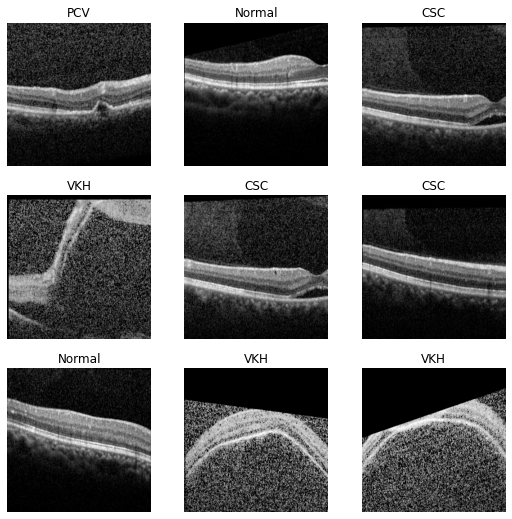

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in test.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


## Normalization

In [16]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1. / 255)
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Training

### Model

In [17]:
num_classes = 4
epochs=10   # จำนวนครั้งที่เราจะ Train

In [18]:
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [20]:
his = model.fit(
train,
validation_data=val,
epochs=epochs
)

Epoch 1/10
38/38 [==============================] - 276s 7s/step - loss: 1.1822 - accuracy: 0.4893 - val_loss: 1.7577 - val_accuracy: 0.2303
Epoch 2/10
38/38 [==============================] - 90s 2s/step - loss: 0.6347 - accuracy: 0.7615 - val_loss: 2.0582 - val_accuracy: 0.3355
Epoch 3/10
38/38 [==============================] - 89s 2s/step - loss: 0.2748 - accuracy: 0.9079 - val_loss: 2.9352 - val_accuracy: 0.3092
Epoch 4/10
38/38 [==============================] - 94s 2s/step - loss: 0.0924 - accuracy: 0.9770 - val_loss: 3.9382 - val_accuracy: 0.2632
Epoch 5/10
38/38 [==============================] - 92s 2s/step - loss: 0.0362 - accuracy: 0.9926 - val_loss: 4.7801 - val_accuracy: 0.2961
Epoch 6/10
38/38 [==============================] - 97s 3s/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 4.4964 - val_accuracy: 0.2961
Epoch 7/10
38/38 [==============================] - 90s 2s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.3696 - val_accuracy: 0.3224
Epoch 8/10
38/38 [=

### Save Model

In [21]:
with open('history_model', 'wb') as file:
   p.dump(his.history, file)

filepath='model1.h5'
model.save(filepath)
filepath_model = 'model1.json'
filepath_weights = 'weights_model.h5'
model_json = model.to_json()
with open(filepath_model, "w") as json_file:
   json_file.write(model_json)

model.save_weights('weights_model.h5')
print("Saved model to disk")

Saved model to disk


### Load Model

In [22]:
with open('history_model', 'rb') as file:
   his = p.load(file)

h1 = go.Scatter(y=his['loss'],
mode="lines", line=dict(
width=2,
color='blue'),
name="loss"
)
h2 = go.Scatter(y=his['val_loss'],
mode="lines", line=dict(
width=2,
color='red'),
name="val_loss"
)

data = [h1,h2]
layout1 = go.Layout(title='Loss',
xaxis=dict(title='epochs'),
yaxis=dict(title=' '))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename="testMNIST")
predict_model = load_model(filepath)
predict_model.summary()
with open(filepath_model, 'r') as f:
   loaded_model_json = f.read()
predict_model = model_from_json(loaded_model_json)
predict_model.load_weights(filepath_weights)
print("Loaded model from disk")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

### Prediction

In [23]:
import requests
from IPython.display import Image
from io import BytesIO

1/1 [==============================] - 0s 167ms/step
CSC tf.Tensor(0.00091739075, shape=(), dtype=float32) Normal tf.Tensor(0.34724095, shape=(), dtype=float32) PCV tf.Tensor(0.31826296, shape=(), dtype=float32) VKH tf.Tensor(0.33357874, shape=(), dtype=float32)


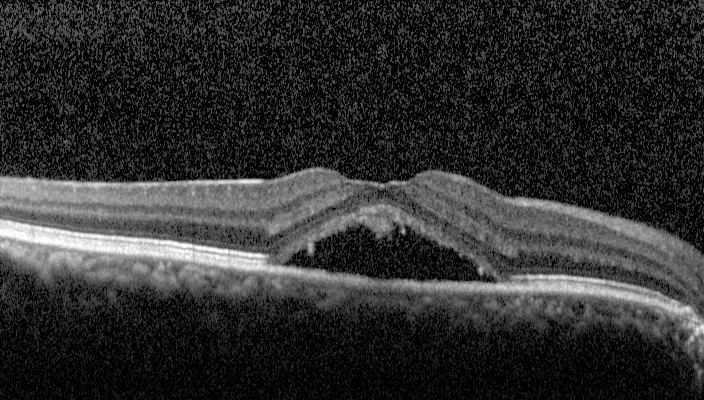

AI Normal มีความมั่นใจ 34.72%.


In [24]:
# CSC
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/CSC/FQ8979 23-03-12 RE_000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 46ms/step
CSC tf.Tensor(4.104397e-06, shape=(), dtype=float32) Normal tf.Tensor(0.99999535, shape=(), dtype=float32) PCV tf.Tensor(2.1518455e-08, shape=(), dtype=float32) VKH tf.Tensor(6.425348e-07, shape=(), dtype=float32)


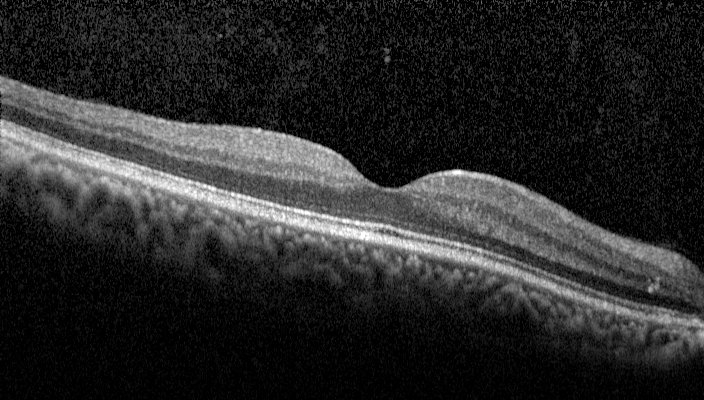

AI Normal มีความมั่นใจ 100.00%.


In [25]:
# Normal
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/Normal/CJ5901 24-01-19 RE_000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 45ms/step
CSC tf.Tensor(0.03699286, shape=(), dtype=float32) Normal tf.Tensor(0.008490905, shape=(), dtype=float32) PCV tf.Tensor(0.0016944481, shape=(), dtype=float32) VKH tf.Tensor(0.9528218, shape=(), dtype=float32)


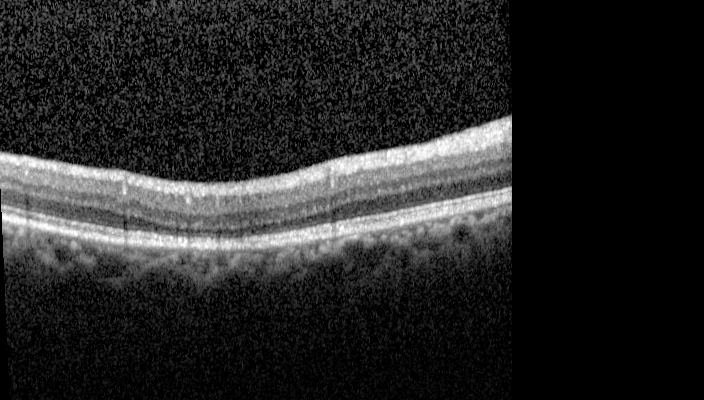

AI VKH มีความมั่นใจ 95.28%.


In [26]:
# PCV
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/PCV/AV0940 20-02-15 RE_000000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 49ms/step
CSC tf.Tensor(0.92871964, shape=(), dtype=float32) Normal tf.Tensor(1.3143414e-08, shape=(), dtype=float32) PCV tf.Tensor(0.027282206, shape=(), dtype=float32) VKH tf.Tensor(0.043998186, shape=(), dtype=float32)


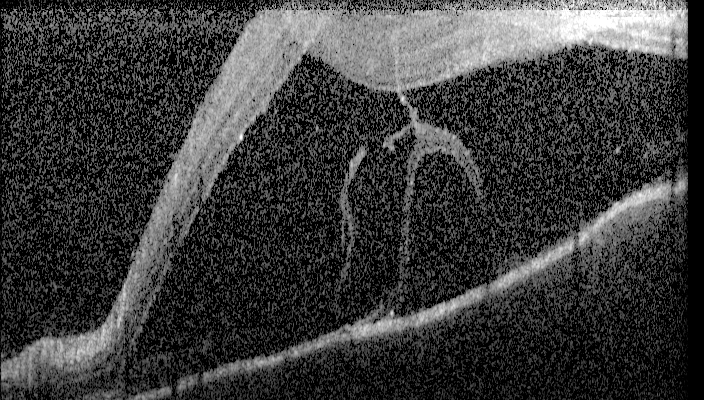

AI CSC มีความมั่นใจ 92.87%.


In [27]:
# VKH
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/VKH/KH7322 18-12-20 LE_000000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

### Testing

In [28]:
y_test = []; y_pred = []
class_names = test.class_names
for images, labels in test:
  for i in range(len(list(labels))):
    img_array = keras.preprocessing.image.img_to_array(images[i])
    X_test = tf.expand_dims(img_array, 0)
    score = predict_model.predict(X_test)
    if score[0][0]==np.max(score):
      eye = "CSC"
    elif score[0][1]==np.max(score):
      eye = "Normal"
    elif score[0][2]==np.max(score):
      eye = "PCV"
    elif score[0][3]==np.max(score):
      eye = "VKH"
    y_pred.append(eye)
    y_test.append(class_names[labels[i]])

1/1 [==============================] - 0s 43ms/step


In [29]:
print(y_test)
print(len(y_test))
print(y_pred)
print(len(y_pred))

['VKH', 'CSC', 'VKH', 'CSC', 'VKH', 'VKH', 'VKH', 'PCV', 'Normal', 'PCV', 'VKH', 'VKH', 'VKH', 'CSC', 'CSC', 'VKH', 'CSC', 'CSC', 'Normal', 'PCV', 'Normal', 'VKH', 'VKH', 'VKH', 'CSC', 'PCV', 'PCV', 'VKH', 'CSC', 'Normal', 'PCV', 'PCV', 'CSC', 'VKH', 'Normal', 'VKH', 'PCV', 'Normal', 'PCV', 'VKH', 'PCV', 'VKH', 'PCV', 'CSC', 'VKH', 'CSC', 'VKH', 'PCV', 'CSC', 'PCV', 'VKH', 'VKH', 'CSC', 'Normal', 'Normal', 'VKH', 'CSC', 'PCV', 'CSC', 'CSC', 'CSC', 'Normal', 'PCV', 'VKH', 'PCV', 'CSC', 'Normal', 'PCV', 'CSC', 'Normal', 'VKH', 'VKH', 'CSC', 'PCV', 'PCV', 'Normal', 'CSC', 'Normal', 'CSC', 'VKH', 'CSC', 'Normal', 'VKH', 'Normal', 'PCV', 'CSC', 'VKH', 'Normal', 'Normal', 'PCV', 'CSC', 'Normal', 'CSC', 'PCV', 'PCV', 'Normal', 'VKH', 'Normal', 'Normal', 'PCV', 'VKH', 'Normal', 'Normal', 'PCV', 'Normal', 'VKH', 'CSC', 'CSC', 'PCV', 'PCV', 'CSC', 'Normal', 'PCV', 'VKH', 'PCV', 'CSC', 'Normal', 'Normal', 'PCV', 'Normal', 'CSC', 'VKH', 'CSC', 'VKH', 'Normal', 'CSC', 'VKH', 'PCV', 'VKH', 'PCV', 'V

## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
confusion_matrix(y_test, y_pred)

array([[25,  0,  1, 12],
       [ 0, 21,  0, 17],
       [13,  8, 17,  0],
       [ 2,  1, 19, 16]])

In [32]:
cm = confusion_matrix(y_test, y_pred)

In [33]:
test.class_names

['CSC', 'Normal', 'PCV', 'VKH']

In [34]:
cm_df = pd.DataFrame(cm,
                     index = ['CSC', 'Normal', 'PCV', 'VKH'], 
                     columns = ['CSC', 'Normal', 'PCV', 'VKH'])

In [35]:
cm_df

,CSC,Normal,PCV,VKH
CSC,25,0,1,12
Normal,0,21,0,17
PCV,13,8,17,0
VKH,2,1,19,16


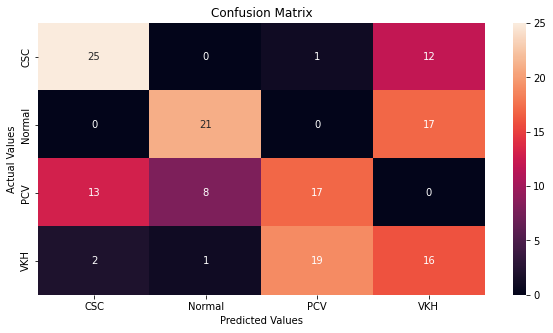

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
     

### หาค่า Accuracy,Recall, Precision, F1-score

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [38]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.519737


In [39]:
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('Recall: %f' % recall)

Recall: 0.519737


In [40]:
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('Precision: %f' % precision)

Precision: 0.535004


In [41]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('F1 score: %f' % f1)

F1 score: 0.524387


## Learning curve

***ติดตั้งแต่ตรงนี้เป็นต้นไปค่ะ***

*จาก https://notebook.community/aboSamoor/data_science_course/ML*

In [53]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation accuracy")

    plt.legend(loc="best")
    return plt

In [55]:
digits = load_digits()
X5, y5 = digits.data, digits.target
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)
estimator = GaussianNB()
__ = plot_learning_curve(estimator, title, X5, y5, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

NameError: ignored

In [56]:
train_scores

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [57]:
valid_scores

array([[0.9, 1. , 1. , 0.8, 1. , 0.8, 0.7, 0.8, 0.8, 0.9],
       [0.9, 0.9, 1. , 0.9, 1. , 0.9, 0.8, 0.8, 0.9, 0.9],
       [1. , 1. , 1. , 0.9, 1. , 0.9, 0.8, 0.8, 0.9, 0.9],
       [1. , 0.9, 1. , 0.9, 1. , 0.9, 0.9, 0.9, 0.8, 0.9],
       [1. , 0.9, 1. , 0.9, 1. , 0.9, 0.9, 0.9, 0.9, 0.9]])